In [1]:
from utils.image import Image
from utils.Visualizations import *
from utils.utils import *
import itertools
import glob
from scipy.stats import normaltest, gaussian_kde, probplot
import numpy as np
import os

In [2]:
dotmark_pictures_path = "DOTmark_1.0/Pictures/"
full_path = os.path.join(os.getcwd(), dotmark_pictures_path)

In [3]:
resolutions = [32, 64, 128, 256, 512]
resolution = 32
image_numbers = ['01','02','03','04','05','06','07','08','09','10']

In [10]:
categories_pattern = os.path.join(dotmark_pictures_path, "*")
category_dirs = [path for path in glob.glob(categories_pattern) if os.path.isdir(path)]
category_names = [os.path.basename(category) for category in category_dirs if os.path.isdir(category)]
for category in category_names:
    print(category)
    
full_path = os.path.join(os.getcwd(), dotmark_pictures_path)

GRFrough
GRFmoderate
CauchyDensity
MicroscopyImages
Shapes
LogGRF
LogitGRF
GRFsmooth
WhiteNoise
ClassicImages


In [28]:
category_names[0]

'GRFrough'

In [20]:
# Load 2 images:
image1 = Image(resolution, category_names[0], 0, full_path).image
image2 = Image(resolution, category_names[0], 1, full_path).image

In [22]:
# Add noise to images
def add_noise(image, noise_level=0.1):
    noise = np.random.normal(0, noise_level, image.shape)
    return image + noise

# Compute squared difference between Fourier coefficients
def compute_fourier_diff(image1, image2):
    # Compute Fourier transforms
    p_k = np.fft.fft2(image1)
    q_k = np.fft.fft2(image2)
    
    # Compute the squared difference between Fourier coefficients
    squared_diff = np.abs(p_k - q_k)**2
    
    return squared_diff

In [30]:
noisy_p = add_noise(image1, noise_level=0.1)
noisy_q = add_noise(image2, noise_level=0.1)

# Compute the Fourier coefficient differences
squared_diff = compute_fourier_diff(noisy_p, noisy_q)

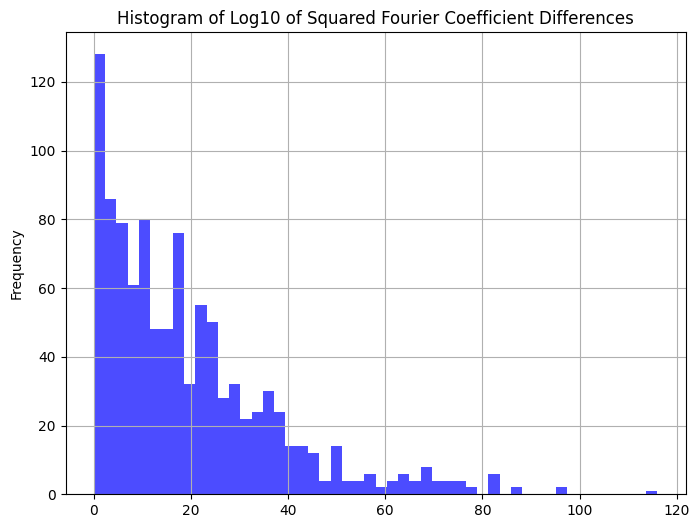

In [31]:
# Flatten and show histogram of the squared differences
squared_diff_flat = squared_diff.flatten()

plt.figure(figsize=(8, 6))
plt.hist(squared_diff_flat, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Log10 of Squared Fourier Coefficient Differences")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [12]:
# Go over the fourier trasnform of the images and see if it looks like some distribution:

In [13]:
def get_fourier_transforms(image_numbers, category_names, resolution):
    fourier_transforms = {}
    for category in category_names:
        print(category)
        fourier_transforms[category] = {}
        for image_number in image_numbers:
            image = Image(resolution, category, image_number, full_path)
            fourier_transforms[category][image_number] = np.fft.fftshift(np.fft.fft2(image.image))
    return fourier_transforms

In [14]:
fourier_transforms = get_fourier_transforms(image_numbers, category_names, resolution)

GRFrough
GRFmoderate
CauchyDensity
MicroscopyImages
Shapes
LogGRF
LogitGRF
GRFsmooth
WhiteNoise
ClassicImages


In [16]:
def plot_image(image, title=None):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

In [17]:
# Now we would like to look into the differences between two fourier transformed images and see the distribution of 
# The absolute value of that, meaning the value of |\hat{I_1} - \hat{I_2}|^2


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fftshift, ifft

# Define the grid size
n = 32

# Define the characteristic function of the sum of chi-squared variables
def characteristic_function(t, grid_size):
    phi = 1
    for k1 in range(1, grid_size + 1):
        for k2 in range(k1, grid_size + 1):
            k_squared = k1**2 + k2**2
            if k1 == k2:
                phi *= (1 - 2j * t / k_squared) ** (-1 / 2)
            else:
                phi *= (1 - 2j * t / k_squared) ** (-1)
    return phi

def integrand(t, s, grid_size):
    # This is the integrand for the inverse Fourier transform to compute the PDF
    return np.real(characteristic_function(t, grid_size) * np.exp(-1j * t * s))

# Compute the PDF using numerical integration
def pdf_via_integration(s, grid_size, t_max=100):
    # Perform the integration for each value of s
    result, error = quad(integrand, -t_max, t_max, args=(s, grid_size))
    return result / (2 * np.pi)

def sanity_check_pdf_normalization(s_vals, pdf_vals):
    # Numerical integration using the trapezoidal rule to check if the PDF integrates to 1
    integral = np.trapz(pdf_vals, s_vals)
    return integral

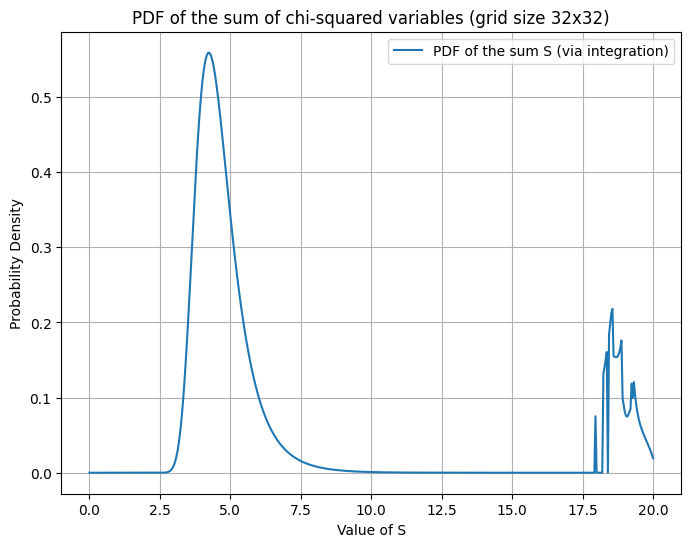

In [29]:
# Generate a range of s values (from 0 to a reasonable upper limit, say 20)
t_max = 400
s_vals_integration = np.linspace(0, 20, 500)
pdf_vals_integration = np.array([pdf_via_integration(s, n, t_max) for s in s_vals_integration])

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(s_vals_integration, pdf_vals_integration, label='PDF of the sum S (via integration)')
plt.title(f'PDF of the sum of chi-squared variables (grid size {n}x{n})')
plt.xlabel('Value of S')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Perform the sanity check
normalization_check = sanity_check_pdf_normalization(s_vals_integration, pdf_vals_integration)

# Display the result of the sanity check
normalization_check

/var/folders/6f/3d7pjjnx0199mxxn8jxjr2y80000gn/T/ipykernel_96944/841471695.py:33: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(pdf_vals, s_vals)


np.float64(1.0129153150720795)